<a href="https://colab.research.google.com/github/benstaf/ChatGPT-Next-Web/blob/main/Gramaddict_gender_filter_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://huggingface.co/spaces/prithivMLmods/Gender-Classifier-Mini

#without storing in memory

In [ ]:

def extract_faces_from_image_pil(image: Image.Image):
    # Convert PIL image to bytes
    img_bytes = io.BytesIO()
    image.save(img_bytes, format='JPEG')
    img_bytes.seek(0)

    files = {'image': ('screenshot.jpg', img_bytes, 'image/jpeg')}
    data = {
        'box_margin': 10,
        'min_confidence': 50.0,
        'return_format': 'base64'
    }

    response = requests.post(f"{YOLO_FACE_API}/extract-faces/", files=files, data=data)

    if response.status_code != 200:
        logging.error(f"[ERROR] Failed to extract faces: {response.status_code}")
        return []

    result = response.json()
    faces = []
    for face_data in result.get('extracted_faces', []):
        image_data = base64.b64decode(face_data['image'])
        face_image = Image.open(io.BytesIO(image_data)).convert("RGB")
        faces.append(face_image)
    return faces


def contains_male_face(image: Image.Image) -> bool:
    try:
        faces = extract_faces_from_image_pil(image)
        for face in faces:
            # Convert face to bytes
            img_bytes = io.BytesIO()
            face.save(img_bytes, format='PNG')
            img_bytes.seek(0)

            files = {"image": ("face.png", img_bytes, "image/png")}
            response = requests.post(API_URL, files=files)

            if response.status_code == 200:
                data = response.json()
                label = data.get("most_likely", "unknown").lower()
                confidence = float(data.get("confidence", 0))

                logging.debug(f"Face classification: {label} ({confidence:.2f})")

                if "male" in label and confidence >= GENDER_CONFIDENCE_THRESHOLD:
                    return True
            else:
                logging.error(f"API error: {response.status_code} - {response.text}")

        return False
    except Exception as e:
        logging.error(f"Gender detection failed: {str(e)}")
        return False

In [ ]:

from PIL import Image
import io

if field_skip_male_faces:
    img_bytes = device.screenshot(format='raw')  # PNG bytes
    image = Image.open(io.BytesIO(img_bytes)).convert("RGB")

    if contains_male_face(image):
        logger.info(f"🚫 Skipping {username} – male face detected in screenshot.")
        return profile_data, self.return_check_profile(
            username, profile_data, SkipReason.MALE_FACE_DETECTED
        )

#new file gender_filter.py

In [ ]:
import requests
import base64
import io
from PIL import Image
import logging

# Your deployed API URL
YOLO_FACE_API = "https://benstaf-yolo-face.hf.space"
API_URL = "https://benstaf-gender-api-fastapi.hf.space/classify/"
GENDER_CONFIDENCE_THRESHOLD = 0.9

def extract_faces_from_image(img_path):
    with open(img_path, 'rb') as f:
        files = {'image': f}
        data = {
            'box_margin': 10,
            'min_confidence': 50.0,
            'return_format': 'base64'
        }
        response = requests.post(f"{YOLO_FACE_API}/extract-faces/", files=files, data=data)

    if response.status_code != 200:
        print(f"[ERROR] Failed to extract faces: {response.status_code}")
        return []

    result = response.json()
    faces = []
    for face_data in result.get('extracted_faces', []):
        image_data = base64.b64decode(face_data['image'])
        face_image = Image.open(io.BytesIO(image_data)).convert("RGB")
        faces.append(face_image)
    return faces

def contains_male_face(img_path):
    try:
        faces = extract_faces_from_image(img_path)
        for face in faces:
            # Convert PIL image to bytes for API
            img_bytes = io.BytesIO()
            face.save(img_bytes, format='PNG')
            img_bytes.seek(0)

            # Send to API
            files = {"image": ("face.png", img_bytes, "image/png")}
            response = requests.post(API_URL, files=files)

            if response.status_code == 200:
                data = response.json()
                label = data.get("most_likely", "unknown").lower()
                confidence = float(data.get("confidence", 0))

                # Debugging logs
                logging.debug(f"Face classification: {label} ({confidence:.2f})")

                if "male" in label and confidence >= GENDER_CONFIDENCE_THRESHOLD:
                    return True
            else:
                logging.error(f"API error: {response.status_code} - {response.text}")

        return False
    except Exception as e:
        logging.error(f"Gender detection failed: {str(e)}")
        return False

In [ ]:
contains_male_face(img_path="/content/testimage6.jpg")

True

In [ ]:
Key additions:

Import Statement: Added

from gender_filter import contains_male_face

New Field Constant in filter yml:

FIELD_SKIP_MALE_FACES = "skip_male_faces"

New Skip Reason: Added
MALE_FACE_DETECTED = auto() to the SkipReason enum

#addition to filter.py after if field_specific_alphabet is not None:


In [ ]:
import time
import os

if field_skip_male_faces:
    screenshot_path = f"/screenshots/{username}.jpg"
    os.makedirs(os.path.dirname(screenshot_path), exist_ok=True)
    device.screenshot(screenshot_path)

    time.sleep(1)  # Allow time for screenshot file to finish writing

    if contains_male_face(screenshot_path):
        logger.info(f"🚫 Skipping {username} – male face detected in screenshot.")
        return profile_data, self.return_check_profile(
            username, profile_data, SkipReason.MALE_FACE_DETECTED
        )

In [ ]:
# Add gender filter check (after all other filters)
        if field_skip_male_faces:
            screenshot_path = f"/content/screenshots/{username}.jpg"
            if contains_male_face(screenshot_path):
                logger.info(f"🚫 Skipping {username} – male face detected in screenshot.")
                return profile_data, self.return_check_profile(
                    username, profile_data, SkipReason.MALE_FACE_DETECTED
                )

        # If no filters return false, we are good to proceed
        return profile_data, self.return_check_profile(username, profile_data, None)

In [ ]:
!pip install retina-face

In [ ]:
#Import Retinaface, CV2 and Matplotlib
#from retinaface import RetinaFace
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r "/content/drive/My Drive/Instagram_screenshots"/* /content/

In [ ]:
!ls -lh /content/

total 13M
drwx------ 5 root root 4.0K Aug  4 12:44 drive
drwxr-xr-x 1 root root 4.0K Jul 29 13:36 sample_data
-rw------- 1 root root 941K Aug  4 12:44 Screenshot_2025-08-02-08-27-18-603_com.instagram.android.jpg
-rw------- 1 root root 1.2M Aug  4 12:44 Screenshot_2025-08-02-08-57-57-949_com.instagram.android.jpg
-rw------- 1 root root 1.2M Aug  4 12:44 Screenshot_2025-08-02-09-15-40-385_com.instagram.android.jpg
-rw------- 1 root root 850K Aug  4 12:44 Screenshot_2025-08-02-09-19-15-123_com.instagram.android.jpg
-rw------- 1 root root 948K Aug  4 12:44 Screenshot_2025-08-02-09-21-15-067_com.instagram.android.jpg
-rw------- 1 root root 845K Aug  4 12:44 testimage2.jpg
-rw------- 1 root root 908K Aug  4 12:44 testimage3.jpg
-rw------- 1 root root 791K Aug  4 12:44 testimage4.jpg
-rw------- 1 root root 857K Aug  4 12:44 testimage5.jpg
-rw------- 1 root root 914K Aug  4 12:44 testimage6.jpg
-rw------- 1 root root 918K Aug  4 12:44 testimage7.jpg
-rw------- 1 root root 992K Aug  4 12:44 tes

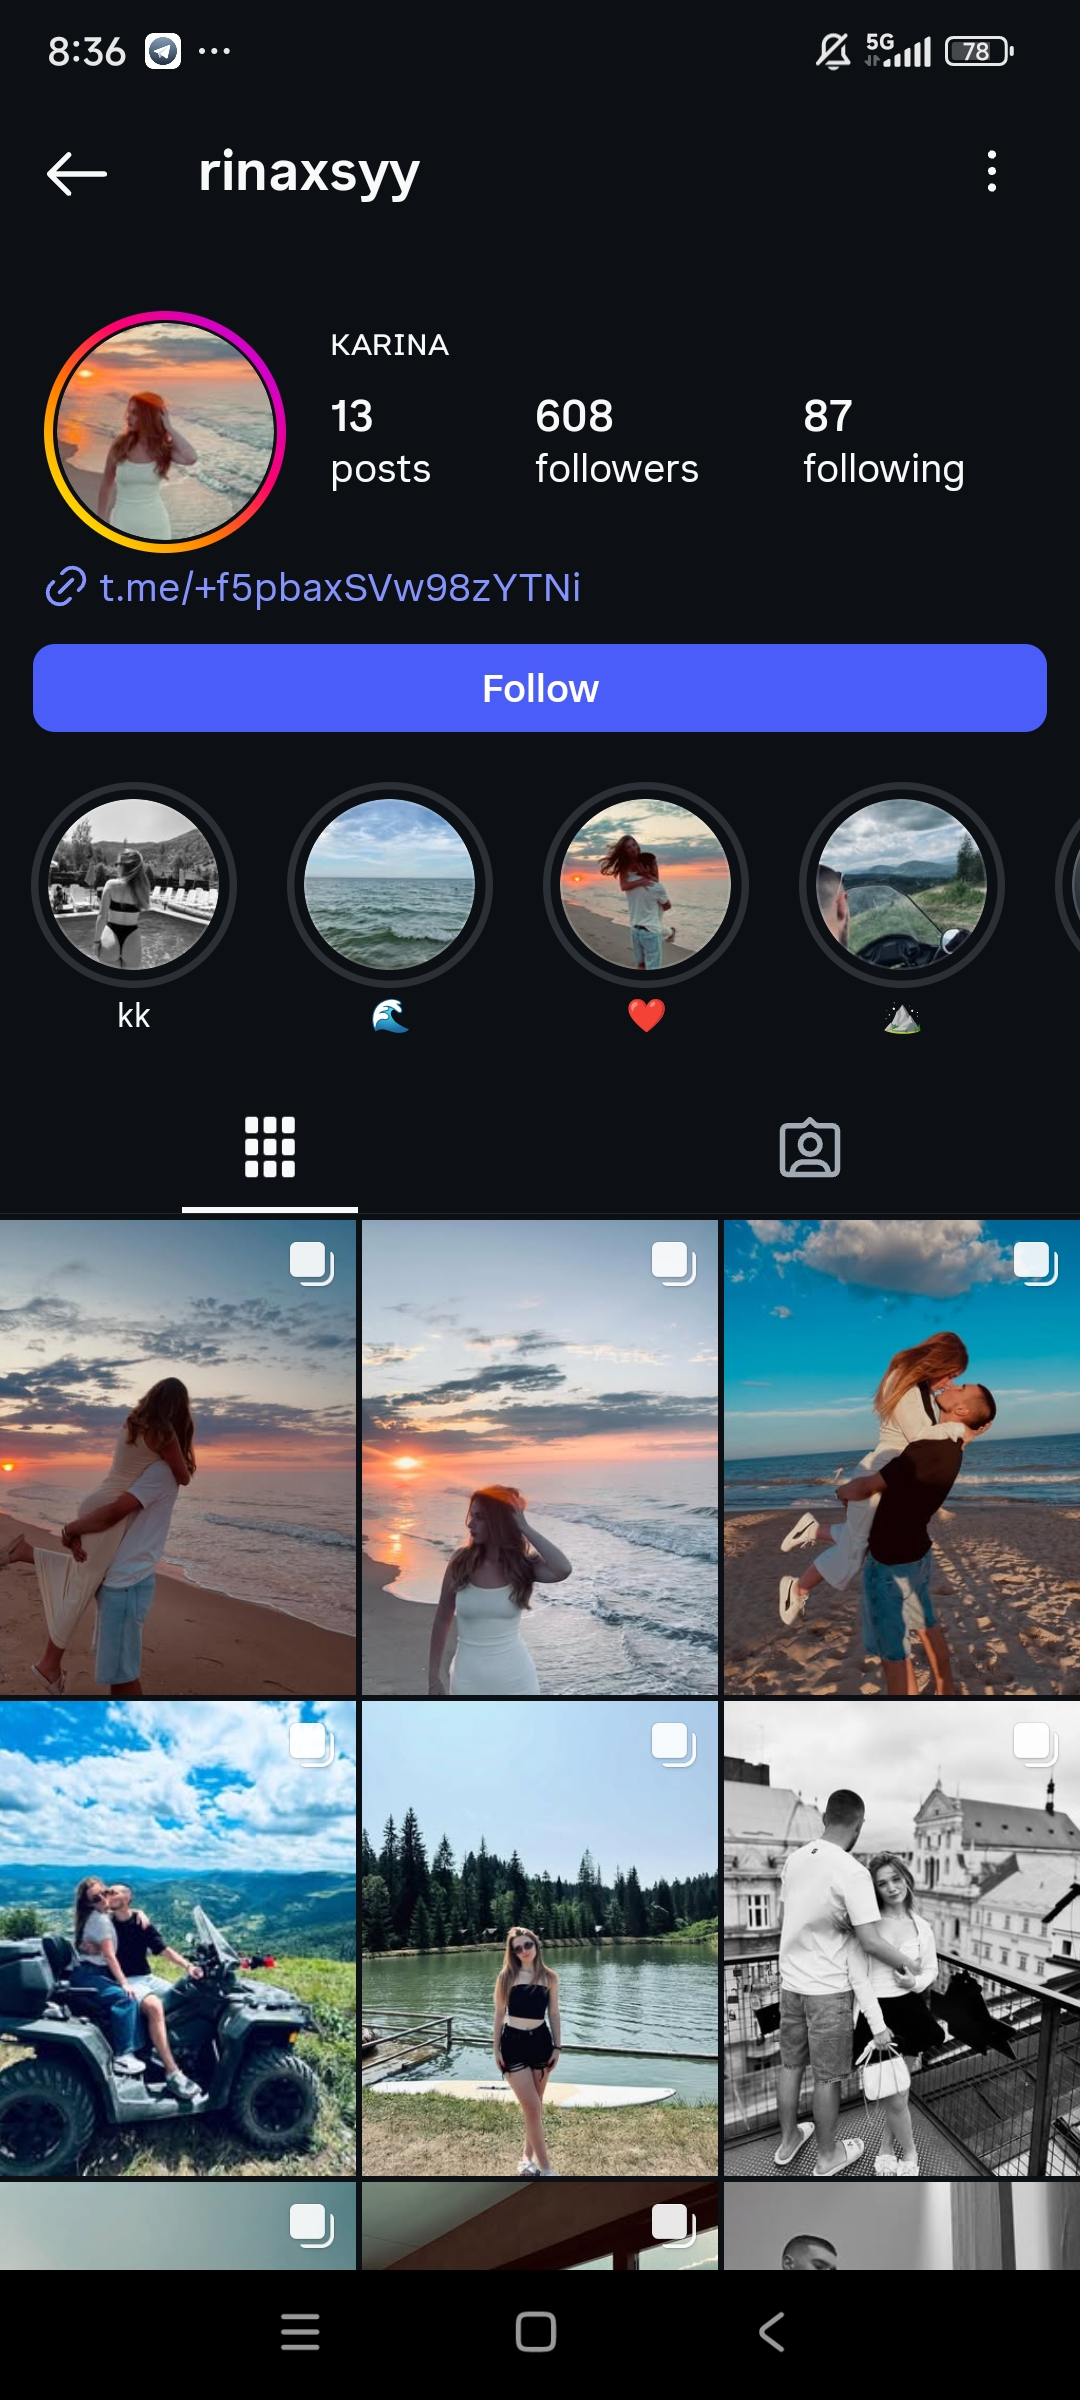

In [ ]:
#Read and display the image
img = cv2.imread('/content/testimage6.jpg')
cv2_imshow(img)

In [ ]:
#Detect faces using RetinaFace
img_faces = RetinaFace.detect_faces(img)

NameError: name 'RetinaFace' is not defined

In [ ]:
#Iterate all objects key areas
for i in img_faces.keys():
  choose = img_faces[i]
  print(choose)

{'score': np.float64(0.9996270537376404), 'facial_area': [np.int64(763), np.int64(1371), np.int64(838), np.int64(1486)], 'landmarks': {'right_eye': [np.float32(793.4989), np.float32(1417.3666)], 'left_eye': [np.float32(826.34204), np.float32(1421.925)], 'nose': [np.float32(813.4643), np.float32(1441.3087)], 'mouth_right': [np.float32(789.8567), np.float32(1454.6912)], 'mouth_left': [np.float32(818.5312), np.float32(1458.7244)]}}
{'score': np.float64(0.9996045231819153), 'facial_area': [np.int64(914), np.int64(1919), np.int64(944), np.int64(1955)], 'landmarks': {'right_eye': [np.float32(934.2847), np.float32(1935.7938)], 'left_eye': [np.float32(939.3227), np.float32(1937.2104)], 'nose': [np.float32(937.7424), np.float32(1944.9105)], 'mouth_right': [np.float32(927.8231), np.float32(1948.0166)], 'mouth_left': [np.float32(930.5817), np.float32(1949.5359)]}}
{'score': np.float64(0.9993969202041626), 'facial_area': [np.int64(99), np.int64(2073), np.int64(212), np.int64(2213)], 'landmarks': {

In [ ]:
#Iterate all objects key areas and mark only face area
for i in img_faces.keys():
  facial_parts = img_faces[i]
  #print(choose)
  recognize_face_area = facial_parts["facial_area"]
  cv2.rectangle(img, (recognize_face_area[2], recognize_face_area[3]), (recognize_face_area[0], recognize_face_area[1]), (255, 255, 255), 1)

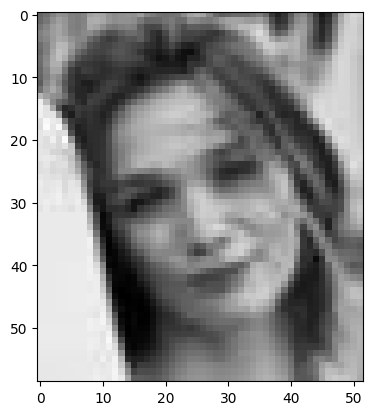

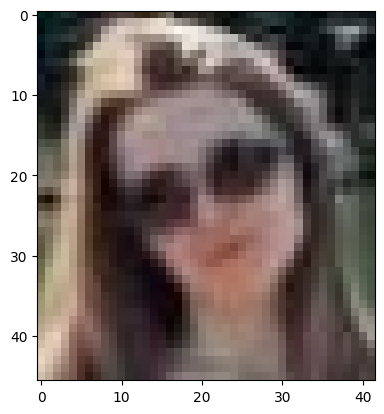

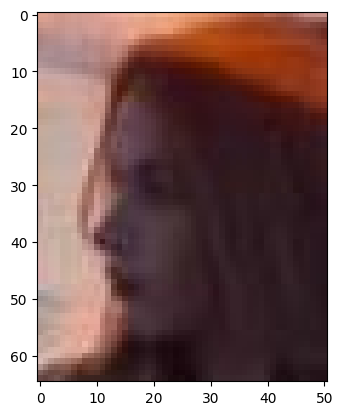

In [ ]:

# Direct replacement for RetinaFace.extract_faces with API
import matplotlib.pyplot as plt
import requests
import base64
import io
from PIL import Image

def extract_faces(img_path, align=True, api_url="https://benstaf-yolo-face.hf.space"):
    """
    Direct replacement for RetinaFace.extract_faces()

    Args:
        img_path: Path to the image file
        align: Kept for compatibility (not used in YOLOv8)
        api_url: Your Hugging Face Space URL

    Returns:
        List of PIL Images (same format as RetinaFace)
    """
    try:
        with open(img_path, 'rb') as f:
            files = {'image': f}
            data = {
                'box_margin': 10,
                'min_confidence': 50.0,
                'return_format': 'base64'
            }

            response = requests.post(f"{api_url}/extract-faces/", files=files, data=data)

        if response.status_code != 200:
            print(f"API Error: {response.status_code}")
            return []

        result = response.json()

        # Convert base64 images back to PIL Images (same format as RetinaFace)
        extracted_faces = []
        for face_data in result['extracted_faces']:
            image_data = base64.b64decode(face_data['image'])
            face_image = Image.open(io.BytesIO(image_data))
            extracted_faces.append(face_image)

        return extracted_faces

    except Exception as e:
        print(f"Error extracting faces: {e}")
        return []

# Your exact original code - just replace the import and API URL
# Replace RetinaFace.extract_faces with our API function
ext_faces = extract_faces(img_path="/content/testimage6.jpg", align=True)
for face in ext_faces:
    if face.size[0] > 0:  # Check if the extracted face is not empty
        plt.imshow(face)
        plt.show()
    else:
        print("Skipping empty face.")  # Optional: print a message for empty faces

In [ ]:
# Your exact original code - just replace the import and API URL
# Replace RetinaFace.extract_faces with our API function
ext_faces = extract_faces(img_path="/content/testimage2.jpg", align=True)
for face in ext_faces:
    if face.size[0] > 0:  # Check if the extracted face is not empty
        plt.imshow(face)
        plt.show()
    else:
        print("Skipping empty face.")  # Optional: print a message for empty faces

25-08-04 07:35:04 - Directory /root/.deepface created
25-08-04 07:35:04 - Directory /root/.deepface/weights created
25-08-04 07:35:04 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /root/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:01<00:00, 106MB/s]


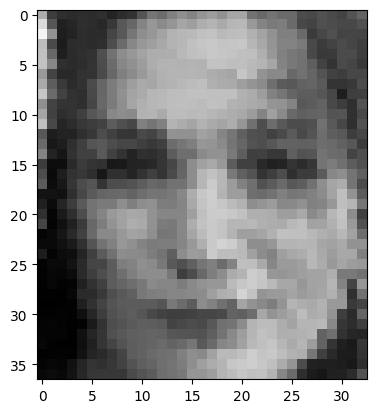

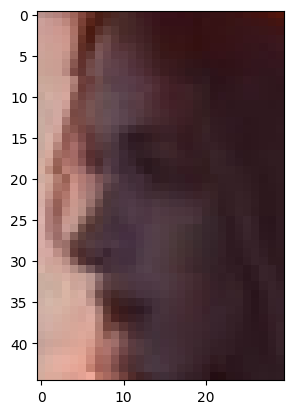

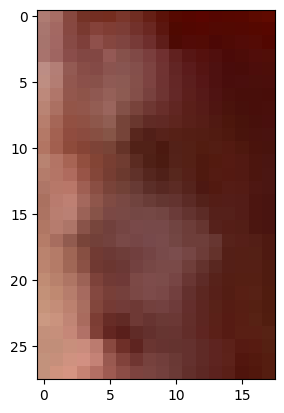

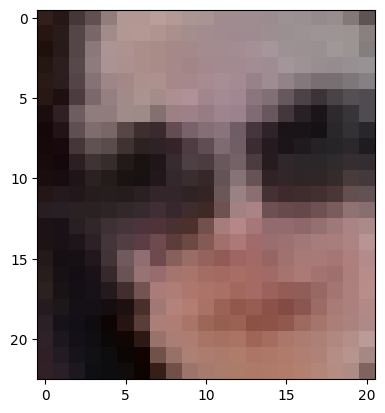

In [ ]:

#Import Retinaface, CV2 and Matplotlib
from retinaface import RetinaFace

#Extract individual faces from the image
import matplotlib.pyplot as plt
ext_faces = RetinaFace.extract_faces(img_path = "/content/testimage6.jpg", align = True)
for face in ext_faces:
  if face.size > 0: # Check if the extracted face is not empty
    plt.imshow(face)
    plt.show()
  else:
    print("Skipping empty face.") # Optional: print a message for empty faces

In [ ]:
!pip install transformers --quiet
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

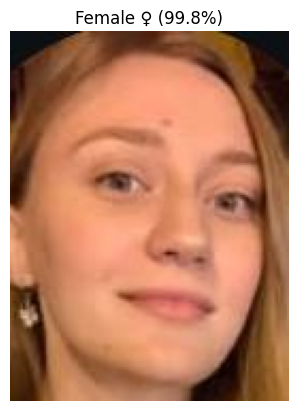

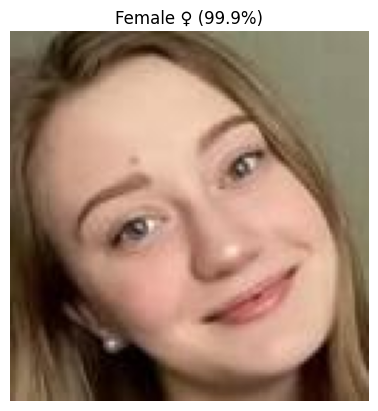

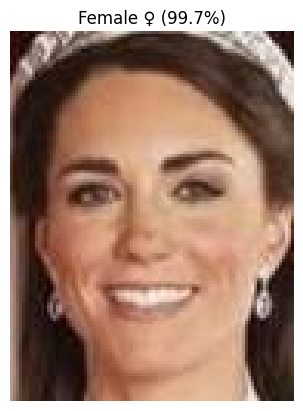

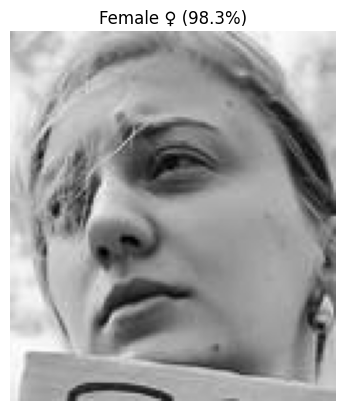

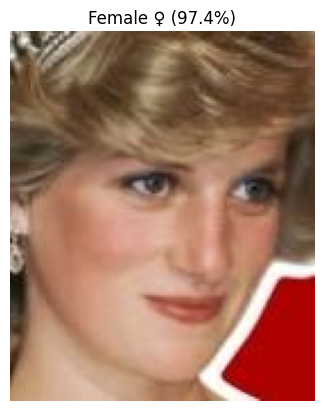

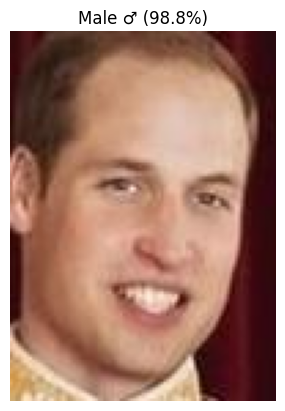

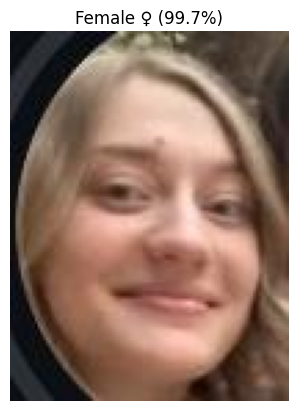

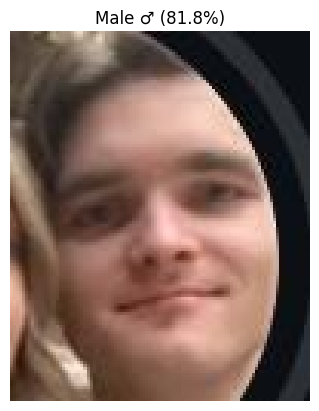

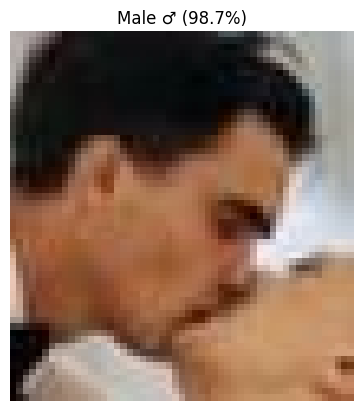

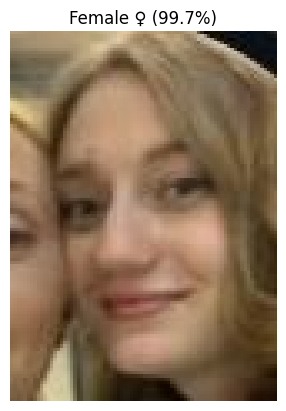

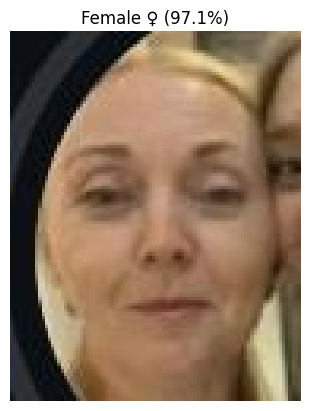

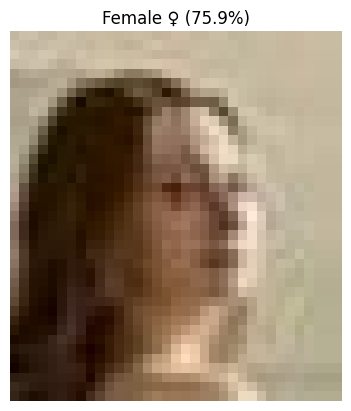


✅ Verdict: At least one male detected.


In [ ]:
import requests
from PIL import Image
import numpy as np
import io
import matplotlib.pyplot as plt

# Your deployed API URL (adjust if hosted elsewhere)
API_URL = "https://benstaf-gender-api-fastapi.hf.space/classify/"

# Store results
results = []

# Classify each face
for i, face in enumerate(ext_faces):
    if face.size == 0:
        print(f"Skipping empty face {i}")
        continue

    # Convert to PIL
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")

    # Convert to bytes for upload
    img_bytes = io.BytesIO()
    face_pil.save(img_bytes, format="PNG")
    img_bytes.seek(0)

    # Send to API
    files = {"image": ("face.png", img_bytes, "image/png")}
    response = requests.post(API_URL, files=files)

    if response.status_code == 200:
        data = response.json()
        label = data.get("most_likely", "Unknown")
        confidence = data.get("confidence", 0.0)

        results.append({
            "face_index": i,
            "label": label,
            "confidence": confidence,
            "image": face_pil
        })

        # Show face and prediction
        plt.imshow(face_pil)
        plt.title(f"{label} ({confidence:.1%})")
        plt.axis('off')
        plt.show()
    else:
        print(f"❌ Failed to classify face {i}. Status: {response.status_code}")

# Final verdict
found_male = any("male" in r["label"].lower() and r["confidence"] > 0.9 for r in results)

print("\n✅ Verdict:", "At least one male detected." if found_male else "Only female faces detected.")

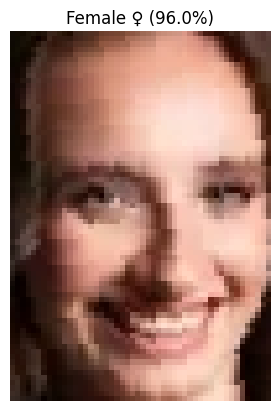

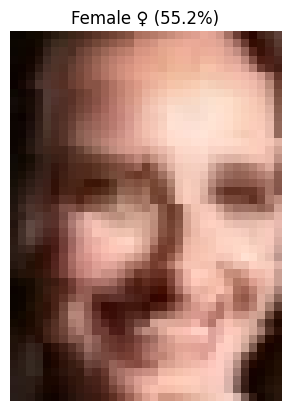

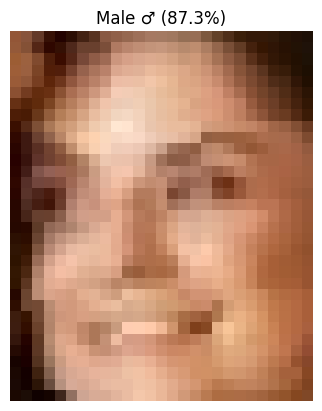

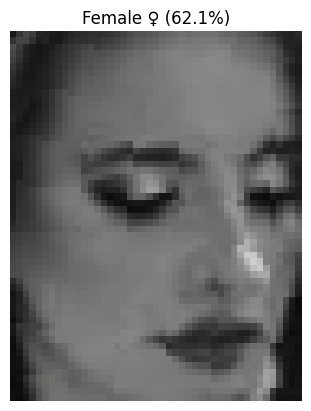

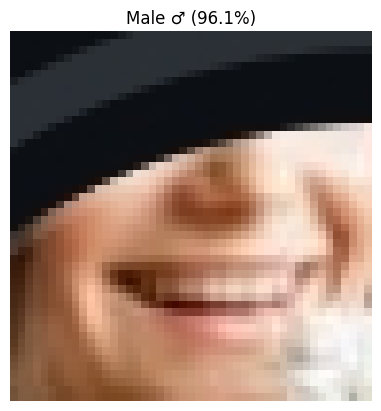


✅ Verdict: At least one male detected.


In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Load model and processor
model = AutoModelForImageClassification.from_pretrained("prithivMLmods/Gender-Classifier-Mini")
processor = AutoImageProcessor.from_pretrained("prithivMLmods/Gender-Classifier-Mini")

# Store results
results = []

# Classify each face
for i, face in enumerate(ext_faces):
    if face.size == 0:
        print(f"Skipping empty face {i}")
        continue

    # Convert to PIL
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")

    # Preprocess and classify
    inputs = processor(images=face_pil, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs).item()
        confidence = probs[0][pred].item()
        label = model.config.id2label[pred]

    # Store prediction
    results.append({
        "face_index": i,
        "label": label,
        "confidence": confidence,
        "image": face_pil
    })

    # Show face and prediction
    plt.imshow(face_pil)
    plt.title(f"{label} ({confidence:.1%})")
    plt.axis('off')
    plt.show()

# Final verdict after all faces are processed
found_male = any("male" in r["label"].lower() and r["confidence"] > 0.9 for r in results)

print("\n✅ Verdict:", "At least one male detected." if found_male else "Only female faces detected.")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/372M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Face 0: Male ♂ (91.90% confidence)


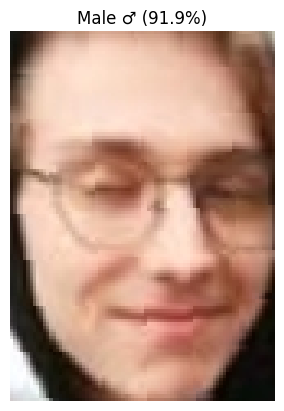

Face 1: Female ♀ (98.78% confidence)


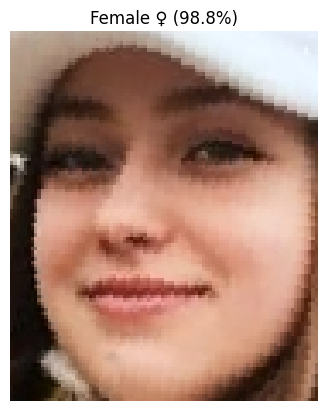

Face 2: Male ♂ (95.78% confidence)


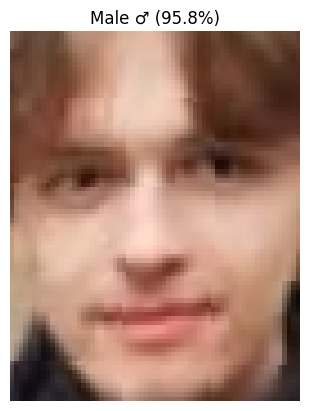

Face 3: Male ♂ (66.14% confidence)


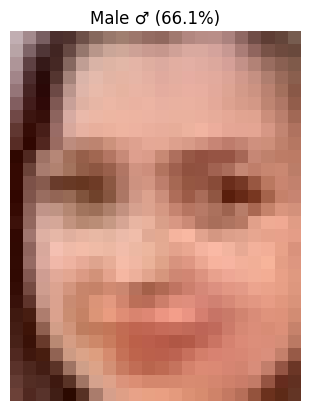

Face 4: Male ♂ (82.79% confidence)


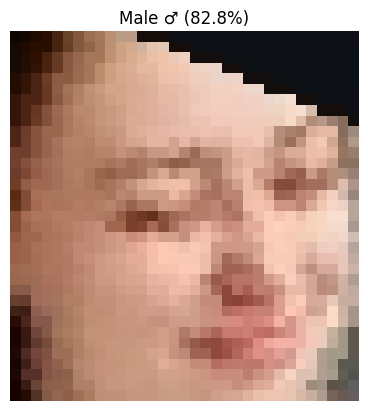

Face 5: Female ♀ (91.24% confidence)


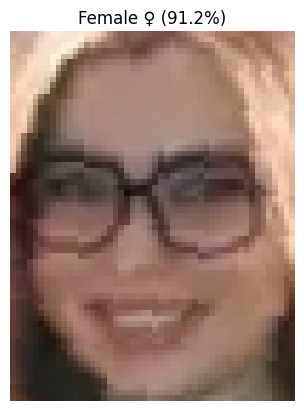

Face 6: Female ♀ (65.60% confidence)


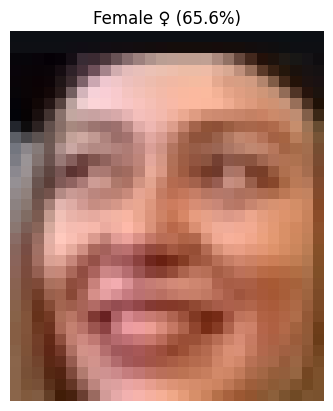

Face 7: Female ♀ (99.26% confidence)


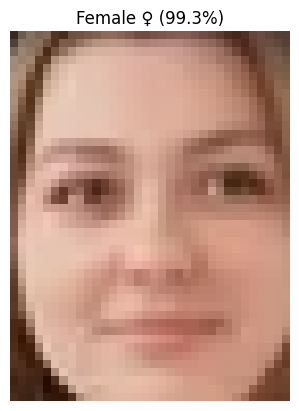

Face 8: Female ♀ (93.16% confidence)


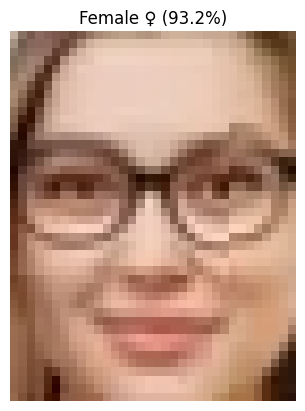

Face 9: Male ♂ (59.46% confidence)


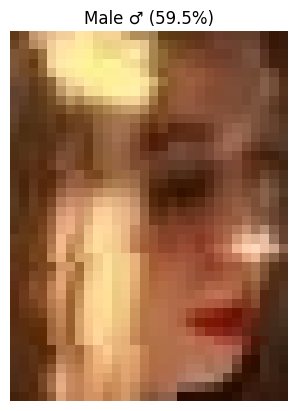

Face 10: Female ♀ (99.06% confidence)


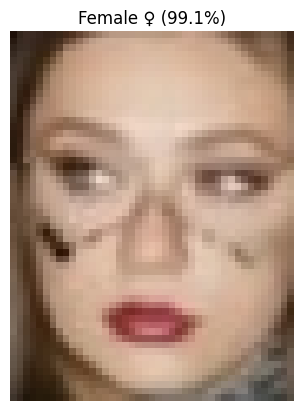

Skipping empty face 11
Face 12: Male ♂ (88.04% confidence)


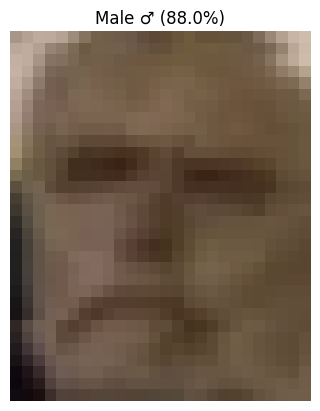

Face 13: Male ♂ (75.80% confidence)


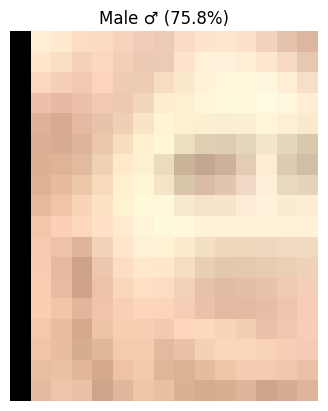

In [ ]:


# Load a gender classification model (SigLIP-based, very accurate)
model = AutoModelForImageClassification.from_pretrained("prithivMLmods/Gender-Classifier-Mini")
processor = AutoImageProcessor.from_pretrained("prithivMLmods/Gender-Classifier-Mini")

# Run each face through the classifier
for i, face in enumerate(ext_faces):
    if face.size == 0:
        print(f"Skipping empty face {i}")
        continue

    # Convert NumPy face (from RetinaFace) to PIL Image
    face_pil = Image.fromarray(np.uint8(face)).convert("RGB")

    # Preprocess and predict
    inputs = processor(images=face_pil, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1)
        pred = torch.argmax(probs).item()
        confidence = probs[0][pred].item()
        label = model.config.id2label[pred]

    # Show result
    print(f"Face {i}: {label} ({confidence:.2%} confidence)")
    plt.imshow(face_pil)
    plt.title(f"{label} ({confidence:.1%})")
    plt.axis('off')
    plt.show()